# TASK #1: PROJECT OVERVIEW

![image1](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image1.png?raw=1)

![image2](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image2.png?raw=1)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.layers import Conv2D, Conv2DTranspose

1. turn on proxy
2. cmd 
3. 
import tensorflow as tf; 
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
# Load dataset 
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

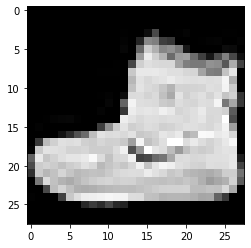

In [5]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [6]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

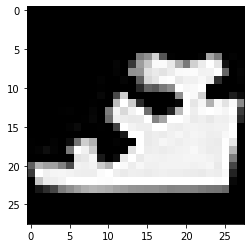

In [9]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap='gray')

In [10]:
label = y_train[i]
label

5

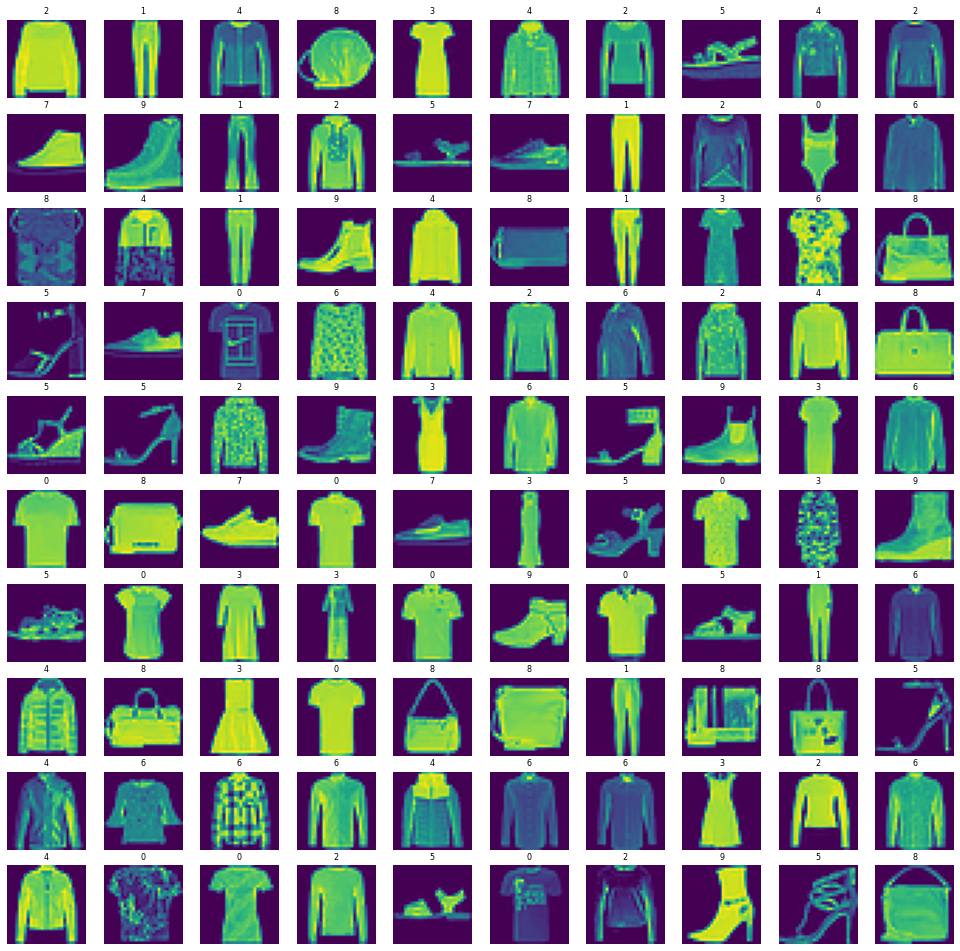

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(i, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')#hide xticks and yticks

# TASK #4: PERFORM DATA PREPROCESSING

In [12]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# add some noise
noise_factor = 0.3
noise_dataset = []

In [15]:
X_train[0].shape

(28, 28)

In [16]:
np.random.randn(2)

array([-0.80798231,  1.8548622 ])

In [17]:
for img in X_train:
    noisy_img = img + noise_factor * np.random.randn(*img.shape)#28*28
    noisy_img = np.clip(noisy_img, 0, 1)#limit the values in an array.
    noise_dataset.append(noisy_img)

In [18]:
noise_dataset = np.array(noise_dataset)

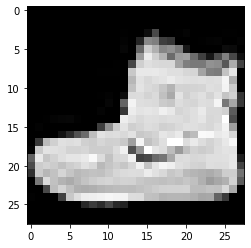

In [19]:
plt.imshow(X_train[0], cmap='gray')

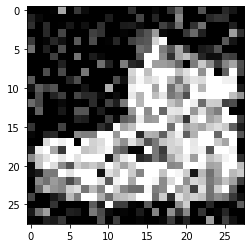

In [20]:
plt.imshow(noise_dataset[0], cmap='gray')

In [21]:
# add noise to testing dataset
noise_factor = 0.1
noise_test_dataset = []

In [22]:
for img in X_test:
    noisy_img = img + noise_factor * np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_test_dataset.append(noisy_img)

In [23]:
noise_test_dataset = np.array(noise_test_dataset)

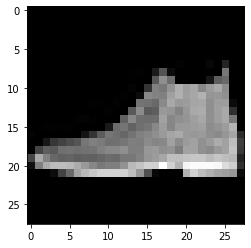

In [24]:
plt.imshow(X_test[0], cmap='gray')

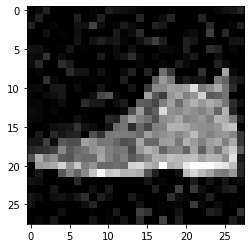

In [25]:
plt.imshow(noise_test_dataset[0], cmap='gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![image3](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image3.png?raw=1)

![image4](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image4.png?raw=1)

![image5](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image5.png?raw=1)

![image6](https://github.com/chinmay-sh/Image_denoising-keras/blob/master/images/image6.png?raw=1)

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [26]:
autoencoder = tf.keras.models.Sequential()

In [27]:
# encoder
autoencoder.add(tf.keras.layers.Input(shape=(28, 28, 1)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), strides=2, padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), strides=2, padding='same'))

In [28]:
# image layer
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), strides=1, padding='same'))

In [29]:
# decoder
autoencoder.add(Conv2DTranspose(filters=16, kernel_size=(3, 3), strides=2, padding='same'))
autoencoder.add(Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=2, padding='same',
                                activation='sigmoid'))

In [30]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   )
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainabl

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
noise_dataset.shape

(60000, 28, 28)

In [32]:
noise_dataset.reshape(-1, 28, 28, 1).shape

(60000, 28, 28, 1)

In [38]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 100,
                batch_size = 200,
                validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), 
                                   X_test.reshape(-1, 28, 28, 1)))

Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 0.3003 - val_loss: 0.2888
Epoch 2/100
300/300 [==============================] - 2s 5ms/step - loss: 0.3002 - val_loss: 0.2880
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 0.3000 - val_loss: 0.2879
Epoch 4/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2999 - val_loss: 0.2884
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2998 - val_loss: 0.2876
Epoch 6/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2996 - val_loss: 0.2886
Epoch 7/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2995 - val_loss: 0.2873
Epoch 8/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2994 - val_loss: 0.2865
Epoch 9/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2993 - val_loss: 0.2869
Epoch 10/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2992 - val_lo

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [43]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1),
                                  X_test.reshape(-1, 28, 28, 1),
                                  verbose=0
                                 )

In [44]:
print('Test score: {:.3f}'.format(evaluation))

Test score: 0.285


In [45]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 19ms/step


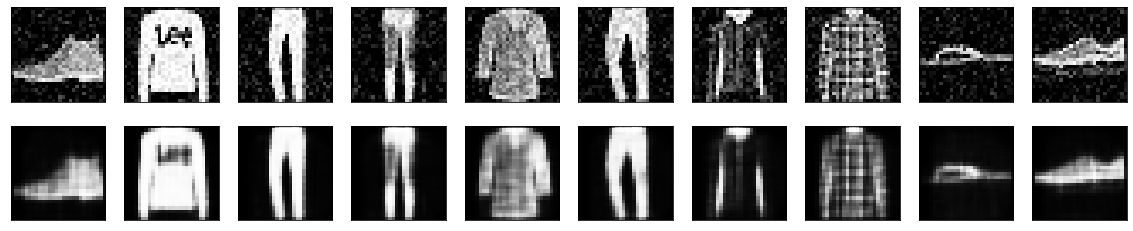

In [42]:
tfig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot